In [49]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [50]:
# IMPORT LIBRARIES AND NOISE DATA FILE
import csv, glob, os, sys, numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import timeit
from scipy.optimize import curve_fit
from scipy import optimize
from scipy.interpolate import griddata
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from scipy import signal
from numpy import NaN, Inf, arange, isscalar, asarray, array
import numpy.polynomial.polynomial as poly
from theano.tensor.signal.pool import pool_2d
from sknn.mlp import Regressor, Layer
from sklearn.preprocessing import StandardScaler 
from scipy import stats; from sklearn import preprocessing
from sklearn.grid_search import RandomizedSearchCV
#from sklearn.cross_validation import train_test_split
from timeit import default_timer as timer
from sklearn.model_selection import KFold

plt.rcParams['xtick.labelsize'] = 15; plt.rcParams['ytick.labelsize'] = 15 #make size of axis tick labels larger

noisefile = '2017-11-03 mxene noise under rh formatted.txt'

rawdata = pd.read_table(noisefile, error_bad_lines=False, sep='\t') #read in file

pd.to_numeric(rawdata['current'], errors='coerce')

0          4.660000e-09
1          2.650000e-09
2          2.650000e-09
3          2.390000e-09
4          2.940000e-09
5          3.560000e-09
6          4.100000e-09
7          4.370000e-09
8          3.780000e-09
9          3.550000e-09
10         2.680000e-09
11         2.620000e-09
12         2.680000e-09
13         2.330000e-09
14         2.110000e-09
15         2.190000e-09
16         1.960000e-09
17         2.600000e-09
18         2.880000e-09
19         3.200000e-09
20         3.360000e-09
21         3.030000e-09
22         3.590000e-09
23         3.320000e-09
24         2.740000e-09
25         1.900000e-09
26         1.660000e-09
27         1.570000e-09
28         1.600000e-09
29         2.140000e-09
               ...     
1048530    2.360000e-09
1048531    2.100000e-09
1048532    2.010000e-09
1048533    1.970000e-09
1048534    1.920000e-09
1048535    1.910000e-09
1048536    1.870000e-09
1048537    1.970000e-09
1048538    2.250000e-09
1048539    3.390000e-09
1048540    2.020

10486 data points used


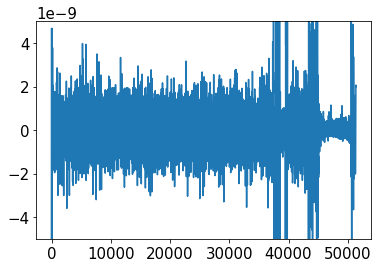

In [51]:
time = np.array(rawdata['time'])
current = np.array(pd.to_numeric(rawdata['current'], errors='coerce'))

#points to skip
skip = 100

timelong = np.copy(time)
currentlong = np.copy(current)


#shorten
timeshort = np.copy(time)[::skip] 
currentshort = np.copy(current)[::skip]

#change to floats
timeshort = timeshort.astype(float)
currentshort = currentshort.astype(float)

print(format(len(timeshort)) + ' data points used')

plt.plot(timeshort, currentshort)
plt.ylim(-0.05e-7, 0.05e-7)
plt.show()

In [52]:
type(current[1])

numpy.float64

In [58]:

#compress each variable to length of pressure data by taking statistics of bins

binnum = 2000

binx = np.arange(len(time))

binned_current = stats.binned_statistic(binx, currentlong, statistic='mean', bins=binnum)[0] 
binned_time = stats.binned_statistic(binx, timelong, statistic='mean', bins=binnum)[0] 



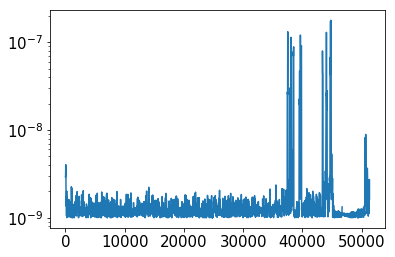

In [57]:
pos_binned_current = np.abs(binned_current)+.000000001


plt.semilogy(binned_time,pos_binned_current)
plt.show()